<a href="https://colab.research.google.com/github/anuanmol/Vend-E-Shampoo/blob/gh-pages/Rivers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>River Pollution Analysis for Top 20 Countries</center></h2>

Let's start by importing the necessary libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import requests
# import io
# from sklearn.linear_model import LinearRegression

Let's load out dataset

In [8]:
# url = "https://github.com/anuanmol/Vend-E-Shampoo/blob/main/DataAnalysis/plastic-top-20-rivers.csv"
# s = requests.get(url).content
# df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = pd.read_csv('plastic-top-20-rivers.csv')
df.head()

,Entity,Code,Year,Plastic mass input from rivers (tonnes)
0,Africa,NaN,2015,109200
1,"Amazon (Brazil, Peru, Colombia, Ecuador)",NaN,2015,38900
2,Asia,NaN,2015,1210000
3,Australia-Pacific,NaN,2015,300
4,Brantas (Indonesia),NaN,2015,38900


Now that we have loaded our dataset, let's see through some of the stats

In [14]:
df.describe()

,Year,Plastic mass input from rivers (tonnes)
count,27.0,2.700000e+01
mean,2015.0,1.392185e+05
std,0.0,3.437195e+05
min,2015.0,3.000000e+02
25%,2015.0,1.415000e+04
50%,2015.0,3.250000e+04
75%,2015.0,5.410000e+04
max,2015.0,1.404200e+06


Check for the additional information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Entity                                   27 non-null     object
 1   Code                                     1 non-null      object
 2   Year                                     27 non-null     int64 
 3   Plastic mass input from rivers (tonnes)  27 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 992.0+ bytes


We can see from the 'info' that there is only 1(one) not-null value in 'Code' column

Let's confirm it with 'isnull()' command

In [13]:
df.isnull().sum()

Entity                                      0
Code                                       26
Year                                        0
Plastic mass input from rivers (tonnes)     0
dtype: int64

In [10]:
df['Code']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23    OWID_WRL
24         NaN
25         NaN
26         NaN
Name: Code, dtype: object

Here, we can see that the column 'Code' contains only one not-null value, so let's drop this feature from our data since it is of no use

We should also rename the "Plastic mass input from rivers (tonnes)" column as "Plastic" as it will be much more easy to use. 

In [24]:
df.rename(columns={"Entity":"Entity", "Year":"Year", "Plastic mass input from rivers (tonnes)":"Plastic"}, inplace=True)

In [25]:
df.drop(['Code'], axis=1)      # dropping the 'Code' column because of large number of null values

,Entity,Year,Plastic
0,Africa,2015,109200
1,"Amazon (Brazil, Peru, Colombia, Ecuador)",2015,38900
2,Asia,2015,1210000
3,Australia-Pacific,2015,300
4,Brantas (Indonesia),2015,38900
5,Central & North America,2015,13400
6,"Cross (Nigeria, Cameroon)",2015,40300
7,Dong (China),2015,19100
8,Europe,2015,3900
9,"Ganges (India, Bangladesh)",2015,115000


Now that we have eliminated NULL values from our data, let's do some descriptive analysis(min value, max_value) etc. 

In [29]:
mx = df['Plastic'].max()              # finding the max value in plastic pollution  
rw1 = df[df['Plastic'] == mx]         # printing the whole row for max value
print("Max row")
print(rw1)

mn = df['Plastic'].min()              # finding the min value in plastic pollution 
rw2 = df[df['Plastic'] == mn]         # printing the whole row for min value
print("Min row")
print(rw2)

Max row
   Entity      Code  Year  Plastic
23  World  OWID_WRL  2015  1404200
Min row
              Entity Code  Year  Plastic
3  Australia-Pacific  NaN  2015      300


In [34]:
top = df[['Entity','Plastic']].sort_values(by='Plastic', ascending = False)
top20 = top[:20]
top20

,Entity,Plastic
23,World,1404200
2,Asia,1210000
25,Yangtze (China),333000
9,"Ganges (India, Bangladesh)",115000
0,Africa,109200
24,Xi (China),73900
21,South America,67400
11,Huangpu (China),40800
6,"Cross (Nigeria, Cameroon)",40300
1,"Amazon (Brazil, Peru, Colombia, Ecuador)",38900


In [37]:
top20.reset_index(inplace=True)
top20.drop('index', axis=1)
top20.set_index('Entity', inplace=True)
top20.head()

,index,Plastic
Entity,,
World,23,1404200
Asia,2,1210000
Yangtze (China),25,333000
"Ganges (India, Bangladesh)",9,115000
Africa,0,109200


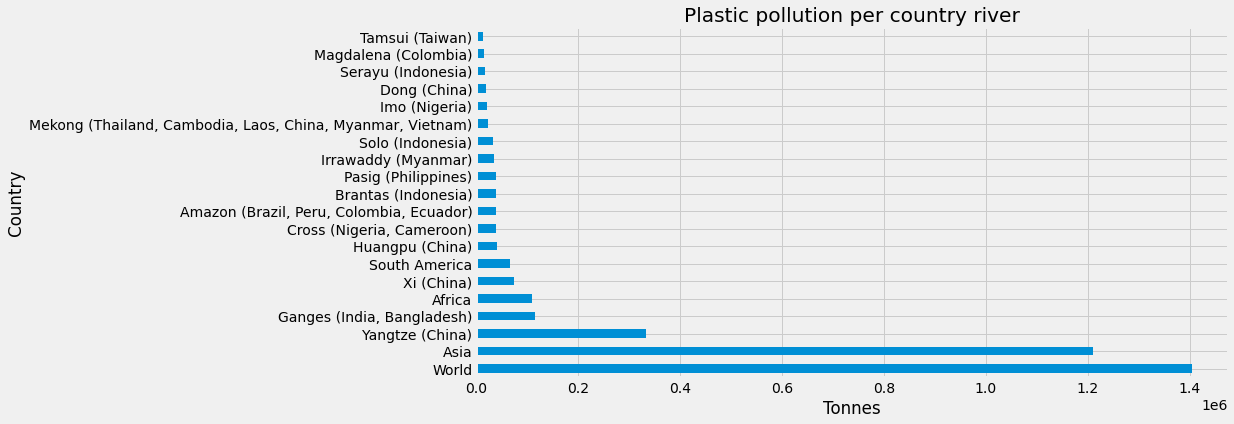

In [50]:
plt.style.use('fivethirtyeight')
top20['Plastic'].plot(kind='barh', figsize=(12,6))
plt.ylabel('Country')
plt.xlabel('Tonnes')
plt.title('Plastic pollution per country river')
plt.show()

From this bar graph above, it is clear that the annual plastic waste poured in our rivers world-wide is more than **1 million metric tonnes** which is a disaster. This data is also of year 2015. Now it's 2021, you yourself can estimate the points where they will end up.


In [49]:
# topp = top[['Entity']]
# ar = [topp[['Entity']][2:12]]
# ar
# topp.reset_index()
# topp.drop('index', axis = 1)
# topp.head()

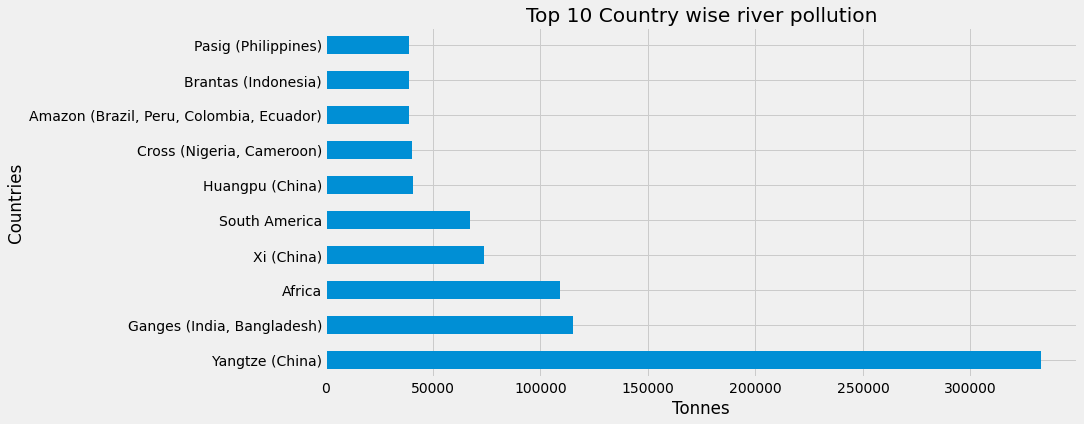

In [52]:
# top 10 countries except world and asia
top10 = top[2:12]
plt.style.use('fivethirtyeight')
top10.reset_index(inplace=True)
top10.drop('index', axis=1)
top10.set_index('Entity', inplace=True)

top10['Plastic'].plot(kind='barh', figsize=(12, 6))
plt.xlabel('Tonnes')
plt.ylabel('Countries')
plt.title('Top 10 Country wise river pollution')
plt.show()

Here, we can see China's Yangtze tops the list with more than **300,000 metric tonnes** of plastic waste being poured on annual basis.

India's Ganges is also a point of concern with more than **100,000 metric tonnes** of plastic in it.